# Fractional Brownian Motion Using Variance Ratio Tests

Consider a sample of $t$ measurements,

$
\begin{align}
X_0, X_1, X_2, \ldots, X_t
\end{align}
$

A test is desired to determine if the series represents brownian motion, which is defined by,

$
\begin{align}
X_t = \sum_{i=1}^t X_i - X_{i-1} = \sum_{i=1}^t \Delta X_{i}
\end{align}
$

where $\Delta X_i$ are independent and identically distributed with distribution,

$
\begin{align}
\Delta X_i \sim \text{Normal}(0, \sigma^2)
\end{align}
$

and

$
\begin{align}
\text{Cov}(\Delta X_i \Delta X_j) = \sigma^2 \delta_{ij}
\end{align}
$

This is the homoscedasticity assumption. Consider the difference,

$
\begin{align}
\Delta X_i(s) = X_i - X_{i+s}
\end{align}
$

So that,

$
\begin{align}
X_t = \sum_{i=1}^n \Delta X_i(s)
\end{align}
$

with $t=ns$. Let, 

$
\begin{align}
\sigma^2(s) = \text{Var}\left(\Delta X_i (s) \right)
\end{align}
$

Recall for brownian motion $\sigma_B^2(t) = \sigma^2t$, it follows that $\sigma^2_B(s) = \sigma^2(1)s$. Consider the ratio,

$
\begin{align}
\text{VR}(s) = \frac{\sigma^2(s)}{\sigma_B^2(s)}
\end{align}
$

where,

$
\begin{align}
&\sigma^2(1) = \frac{1}{t-1} \sum_{i=1}^t \left(X_i - X_{i-1} - \mu \right) \\
&\mu = \frac{1}{t} \left( X_t - X_0 \right)
\end{align}
$

In Lo and Mackinlay, 1988, "Stock market Prices do not Follow Random Walks" it was shown that an unbiased estimator of</br>
$\sigma^2(s)$ is given by,

$
\begin{align}
\sigma^2(s) = \frac{1}{m} \sum_{i=s}^t \left( X_t - X_{t-s} - s\mu \right)^2
\end{align}
$

where,

$
\begin{align}
m = \left(t - s + 1 \right) \left( 1 - \frac{s}{t} \right)
\end{align}
$

If $X_t$ is brownian motion, $\sigma^2(s) = \sigma^2(1)$, $s = \sigma^2_B(s)$. It follows that $\text{VR}(s) = 1$. A test statistic</br>
for this condition is given by,

$
\begin{align}
Z(s) = \frac{\text{VR}(s) - 1}{\sqrt{\theta(s)}}
\end{align}
$

where,

$
\begin{align}
\theta(s) = \frac{2\left( 2s - 1 \right)\left( s - 1 \right)}{3st}
\end{align}
$

and $Z(s) \sim \text{Normal}(0,1)$. This test-statistic was derived assuming homoscedasticity which implies that the</br>
random component is independent of $s$. If instead the random component varies with $s$ heteroscedasticity is assumed.

For this case the test-statistic is given by,

$
\begin{align}
Z^\ast(s) = \frac{\text{VR}(s) - 1}{\sqrt{\theta^\ast (s)}}
\end{align}
$

where,

$
\begin{align}
&\theta^\ast (s) = \sum_{j=1}^{s-1} \left[ \frac{2\left( s - j \right) } {s} \right]^2 \hat{\delta}(j) \\
&\hat{\delta}(j) = \frac{\sum_{i=j+1}^t \left( X_i - X_{i-1} - \mu \right)^2 \left( X_{i-j} - X_{i-j-1} - \mu \right)^2}{\left[ \sum_{i=1}^t \left( X_i - X_{i-1} - \mu \right)^2 \right]^2}
\end{align}
$

The significance test using $Z(s)$ and $Z^\ast(s)$ succeeds if the time series is brownian motion. This test is implemented using two tails and</br> 
the series is brownian motion if it succeeds. A test for $H<0.5$ uses a lower tail test and succeeds if the test for brownian motion fails. Similarly,</br>
A test for $H>0.5$ would use an upper tail test and succeed if the test for brownian motion fails.

## Import

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import config
from lib import plots

from lib.plots.data import (DataPlotType, curve, comparison)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.dist import (DistPlotType, htest)
from lib.plots.config import (logspace)

from lib.dist import (HypothesisType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
def lag_var(samples, s_vals):
    return numpy.array([fbm.lag_var(samples, s) for s in s_vals])

def vr_stat_homo(samples, s_vals):
    vr = numpy.array([])
    for sample in samples:
        vr = numpy.append(vr, [fbm.vr_stat_homo(sample, s) for s in s_vals], axis=0)
    return vr

def vr(samples, s_vals):
    return [fbm.vr(samples, s) for s in s_vals]
    
def labels(H_vals):
    return [f"H={H}" for H in H_vals]

def sample_plot(samples, H):
    title = f"Fractional Brownain Motion Example: H={H}, σ=1.0"
    curve(samples, title=title, plot_type=DataPlotType.TIME_SERIES)
    
def lag_var_plot(samples, s_vals, H):
    title = r"Fractional Brownain Motion $\sigma^2(s)$" + f": H={H}, σ=1.0"
    fcompare(lag_var(samples, s_vals), x=s_vals, npts=20, title=title, params=[H], plot_type=FuncPlotType.LAGG_VAR)
    
def vr_plot(samples, s_vals, H):
    title = r"Fractional Brownain Motion $VR(s)$: " + f"H={H}, σ=1.0"
    fcompare(vr(samples, s_vals), x=s_vals, npts = 20, title=title, params=[H], plot_type=FuncPlotType.VR)
    
def homo_test_stat_plot(s_vals, samples, H, test_type=HypothesisType.TWO_TAIL):
    test_stats = homo_test_stats(s_vals, samples)
    labels = test_stat_labels(s_vals)
    title = f"Homoscedastic Variance Ratio Test: H={H}, σ=1.0"
    htest(test_stats, DistPlotType.VR_TEST, title=title, labels=labels, test_type=test_type)

def hetero_test_stat_plot(s_vals, samples, H, test_type=HypothesisType.TWO_TAIL):
    test_stats = hetero_test_stats(s_vals, samples)
    labels = test_stat_labels(s_vals)
    title = f"Heteroscedastic Variance Ratio Test: H={H}, σ=1.0"
    htest(test_stats, DistPlotType.VR_TEST, title=title, labels=labels, test_type=test_type)

def homo_test_stats(s_vals, samples):
    return [fbm.vr_stat_homo(samples, s) for s in s_vals]

def hetero_test_stats(s_vals, samples):
    return [fbm.vr_stat_hetero(samples, s) for s in s_vals]

def test_stat_labels(s_vals):
    return [f"s={format(s, '4.0f')}" for s in s_vals]

def H_labels(H_vals):
    return [f"H={format(H, '1.2f')}" for H in H_vals]

def vr_stats(samples, s_vals):
    stats = numpy.array([[fbm.vr_stat_homo(samples[0], s) for s in s_vals]])
    n = len(samples)
    for i in range(1,n):
        vr = [fbm.vr_stat_homo(samples[i], s) for s in s_vals]
        stats = numpy.concatenate((stats, [vr]), axis=0)
    return stats

## $\sigma^2 (s)$ and $\text{VR}(s)$ Verification

The $\sigma^2 (s)$ calculation is verified by comparing with $t^{2H}$. The variance ration is given by,

$
\begin{align}
\text{VR}(s) = \frac{\sigma^2(s)}{\sigma_B^2(s)}
\end{align}
$

Since $\sigma^2(s) \sim t^{2H}$ and $\sigma_B^2(s) \sim t$ it follows that $\text{VR}(s) \sim t^{2H - 1}$. Here the variance ratio computed from simulations is</br>
compared with $t^{2H-1}$

In [3]:
npts = 2**16
s_vals = numpy.array([int(s) for s in logspace(100, npts/10, 1.0)])
H_vals = [0.5, 0.3, 0.8]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

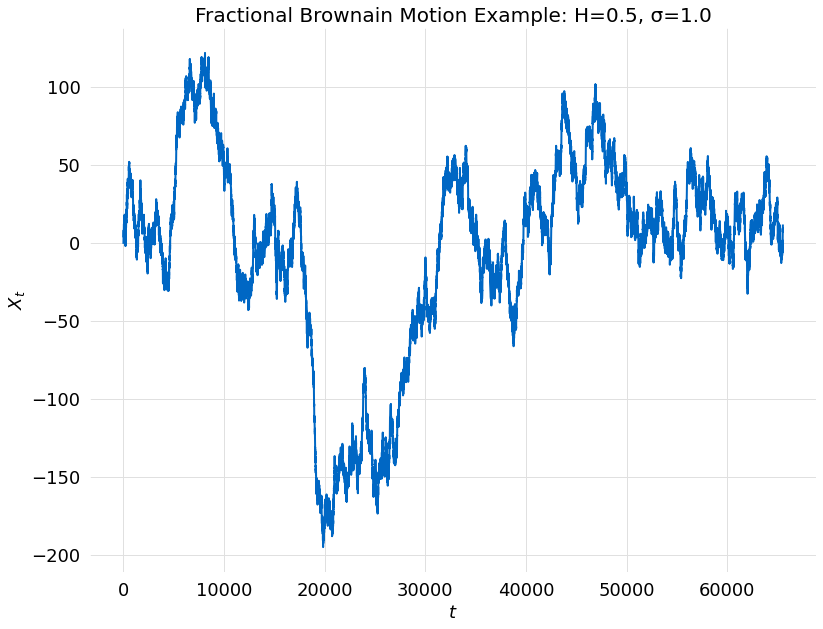

In [4]:
sample_plot(samples[0], H_vals[0])

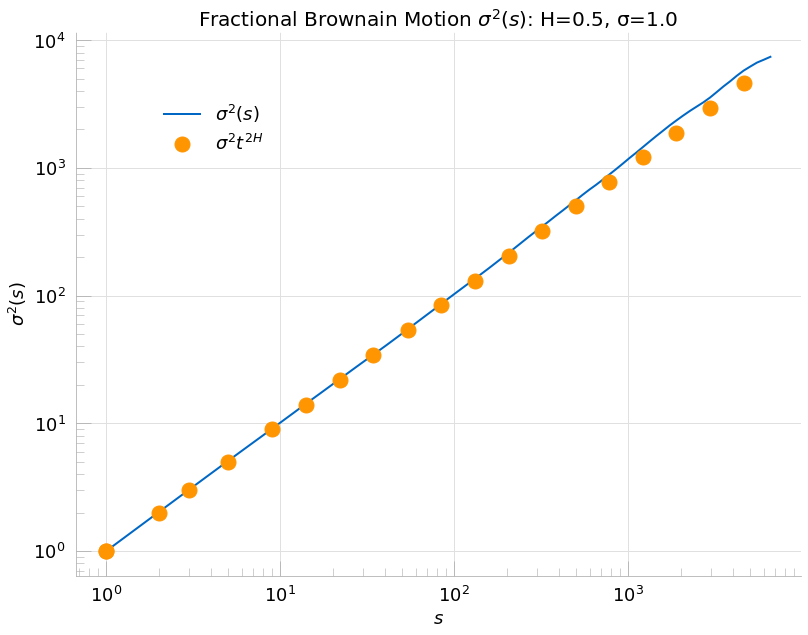

In [5]:
lag_var_plot(samples[0], s_vals, H_vals[0])

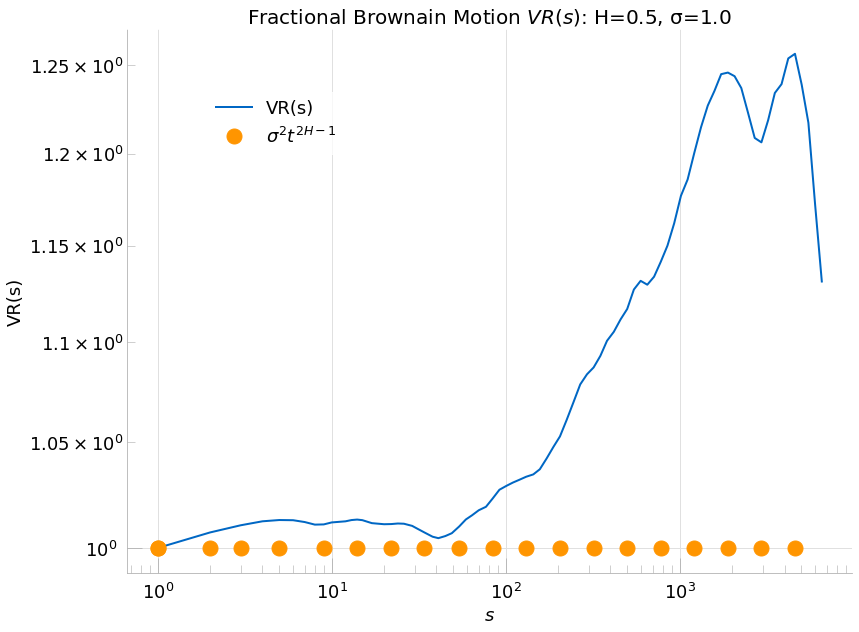

In [6]:
vr_plot(samples[0], s_vals, H_vals[0])

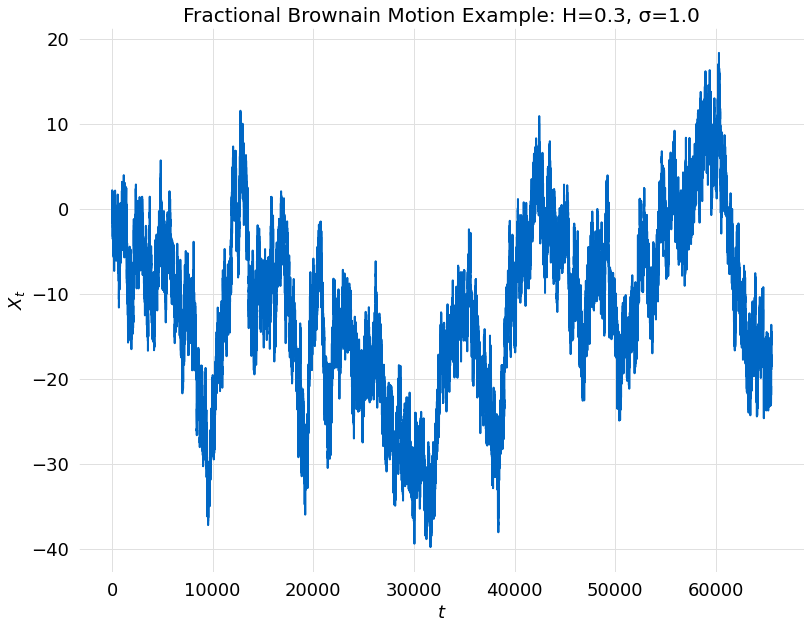

In [7]:
sample_plot(samples[1], H_vals[1])

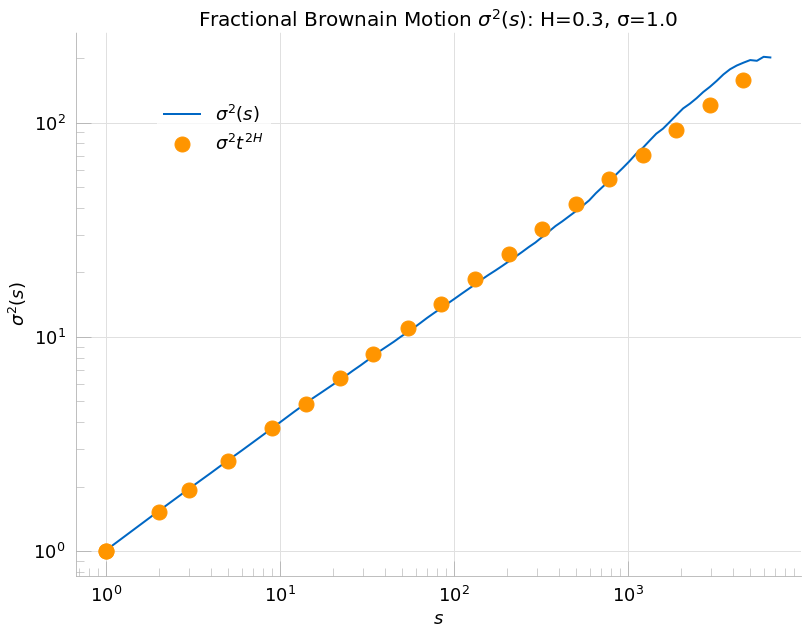

In [8]:
lag_var_plot(samples[1], s_vals, H_vals[1])

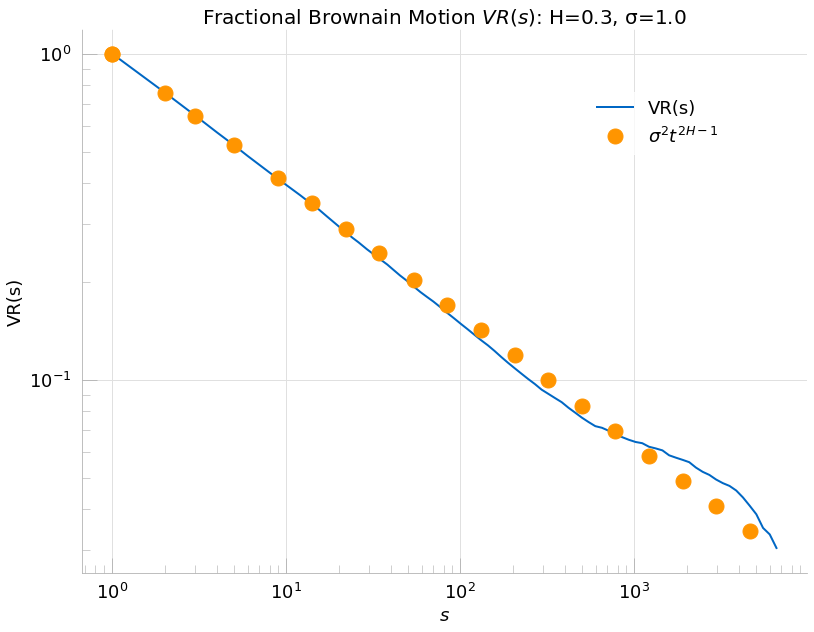

In [9]:
vr_plot(samples[1], s_vals, H_vals[1])

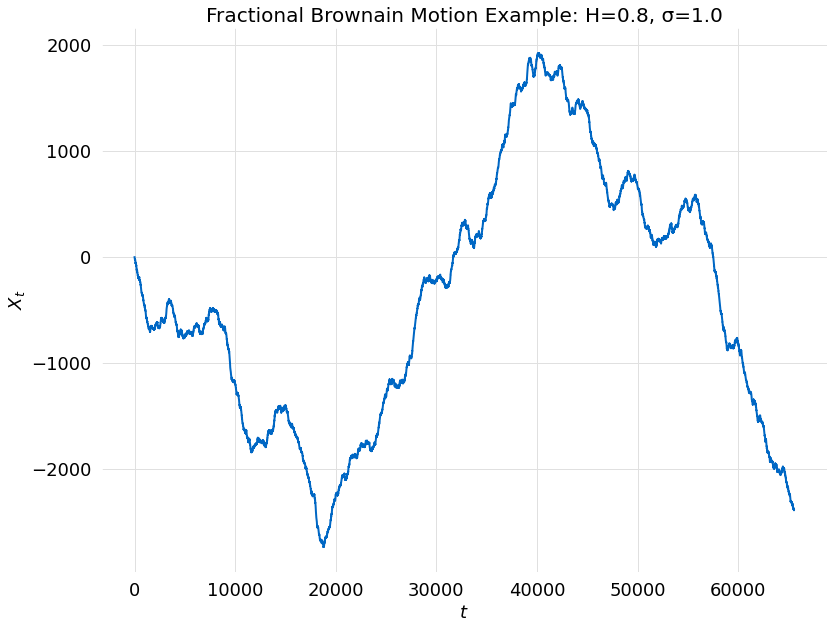

In [10]:
sample_plot(samples[2], H_vals[2])

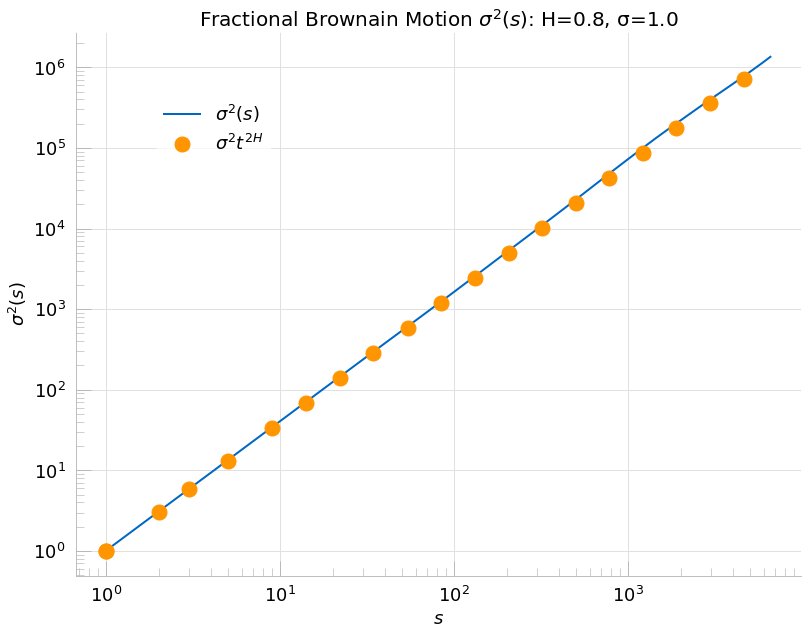

In [11]:
lag_var_plot(samples[2], s_vals, H_vals[2])

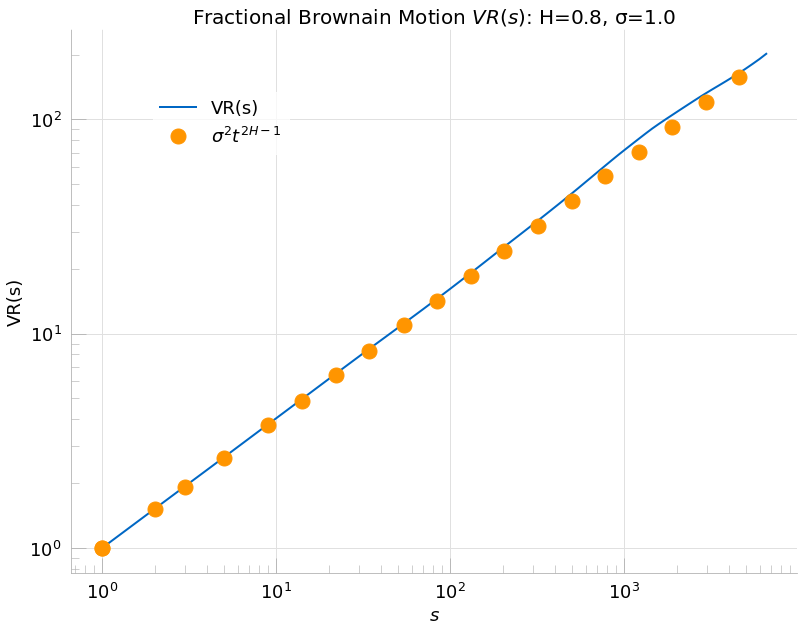

In [12]:
vr_plot(samples[2], s_vals, H_vals[2])

## Small Sample Size

In the previous verification section a rather large sample size was used to provide enough data to compute accurate averages. In general</br>
this is not practical. here more realistic sample sizes are used to see the impact on the analysis. 

In [13]:
npts = 2**9
s_vals = numpy.array([int(s) for s in logspace(100, npts/10, 1.0)])
H_vals = [0.5, 0.3, 0.8]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

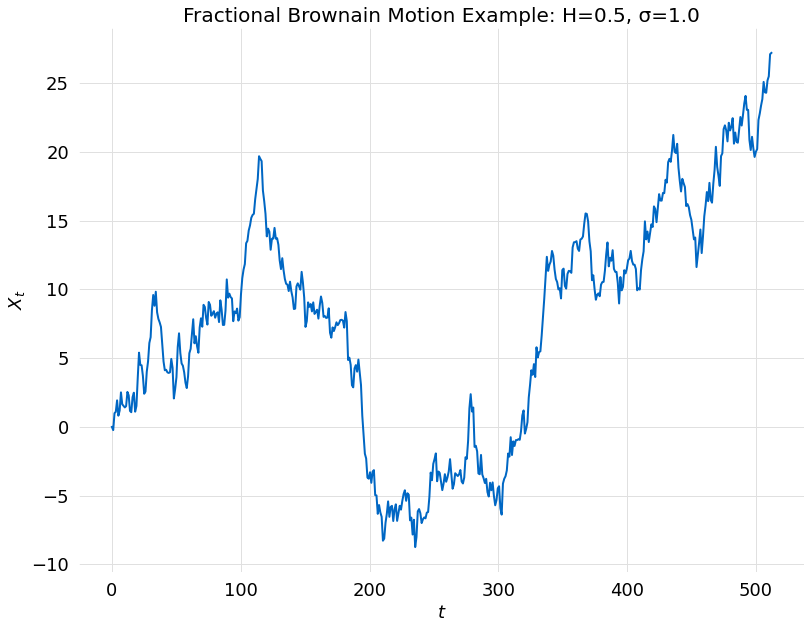

In [14]:
sample_plot(samples[0], H_vals[0])

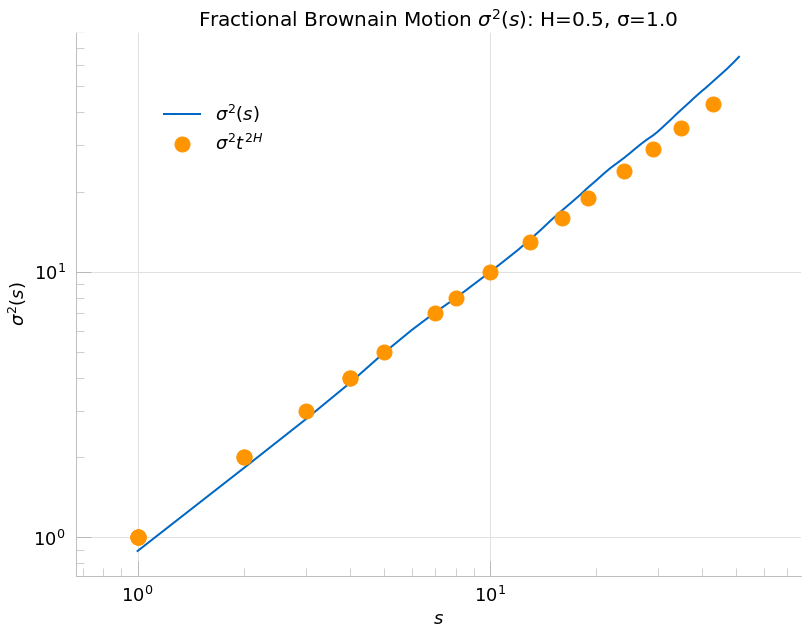

In [15]:
lag_var_plot(samples[0], s_vals, H_vals[0])

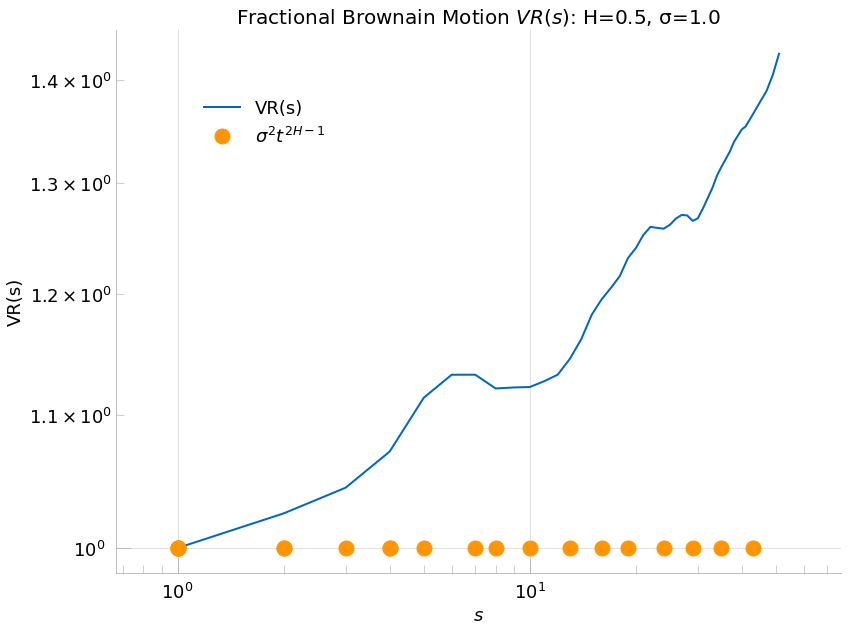

In [16]:
vr_plot(samples[0], s_vals, H_vals[0])

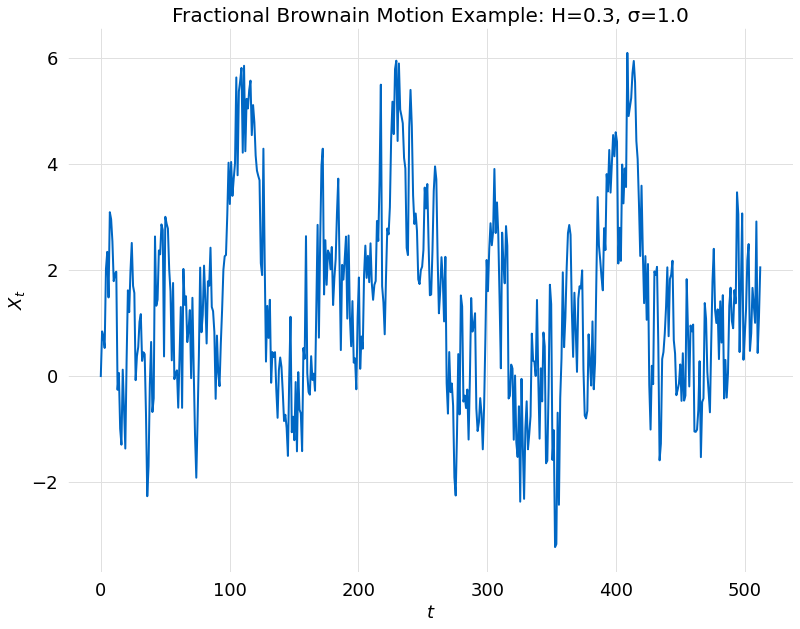

In [17]:
sample_plot(samples[1], H_vals[1])

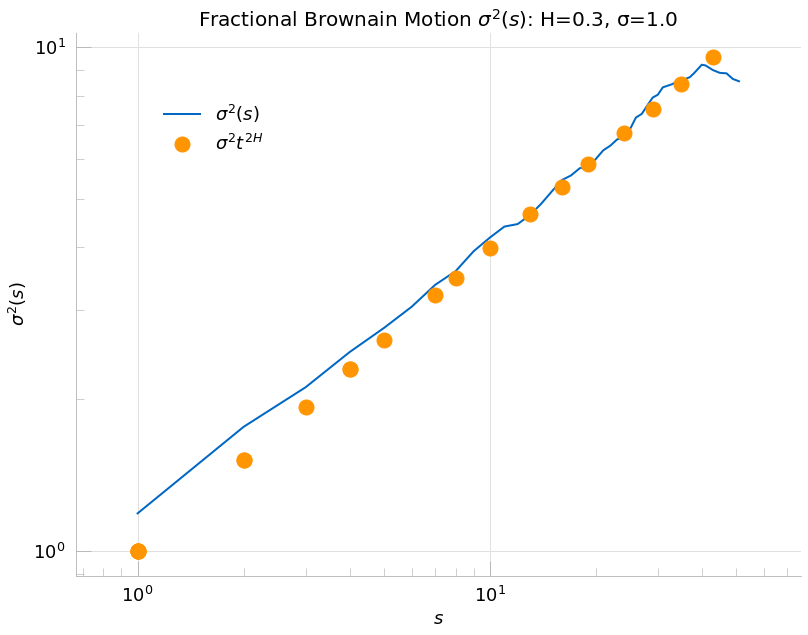

In [18]:
lag_var_plot(samples[1], s_vals, H_vals[1])

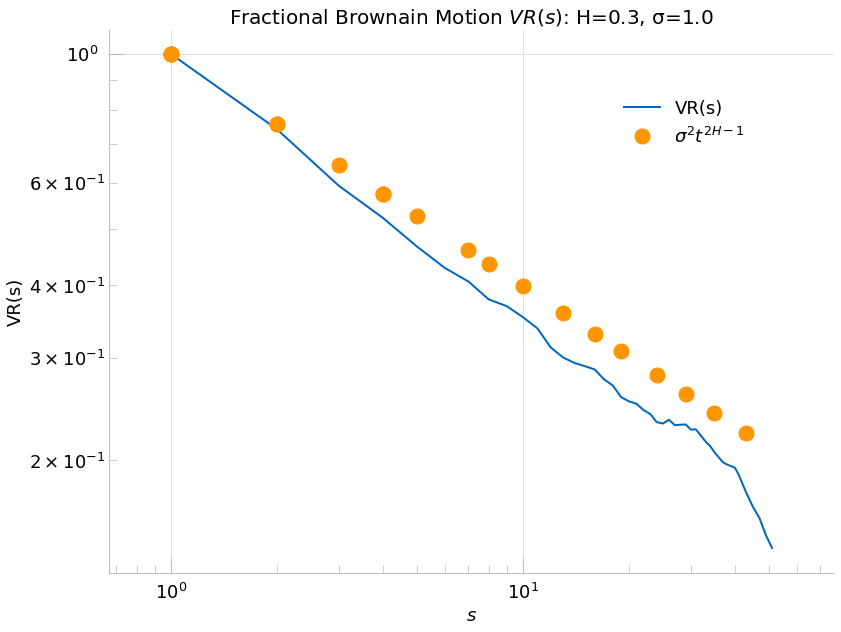

In [19]:
vr_plot(samples[1], s_vals, H_vals[1])

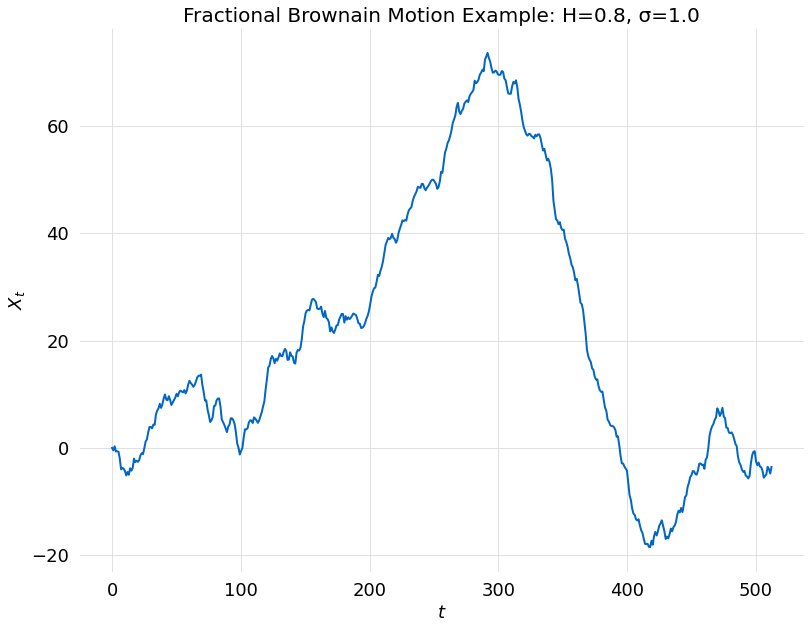

In [20]:
sample_plot(samples[2], H_vals[2])

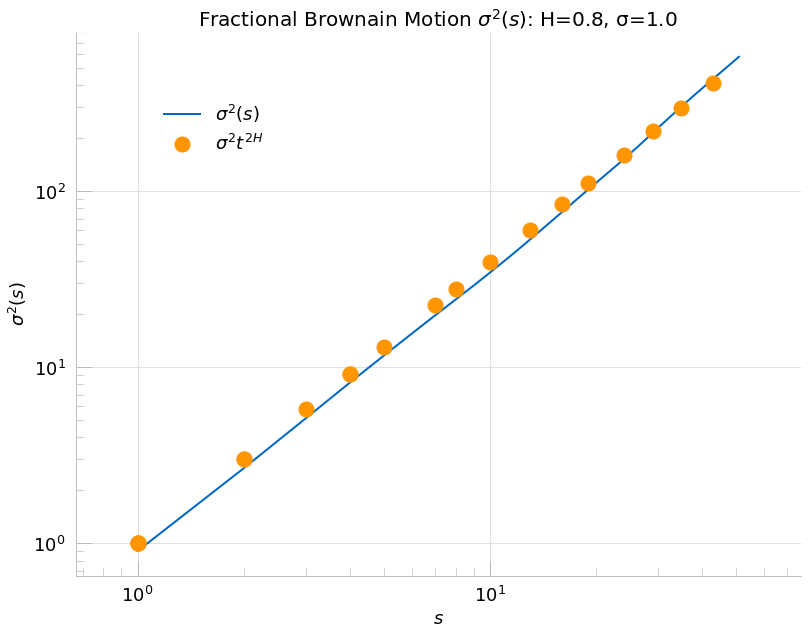

In [21]:
lag_var_plot(samples[2], s_vals, H_vals[2])

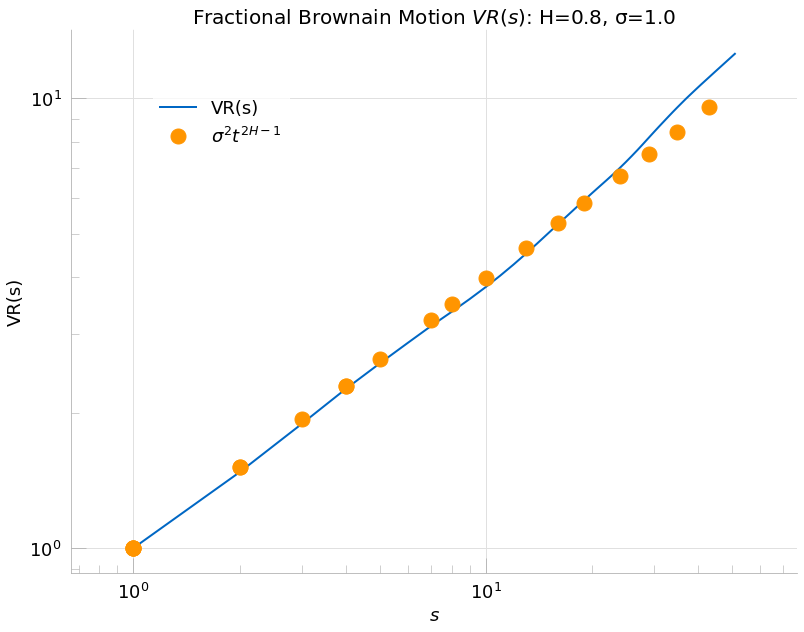

In [22]:
vr_plot(samples[2], s_vals, H_vals[2])

## Variance Ratio Test Statistic

In this section simulations that test the homoscedastic and heteroscedastic variance ratio test statistic are presented. First large time series are</br>
analyzed followed by more realistic series lengths. A range of $H$ values is used.

In [23]:
npts = 2**16
s_vals = [2, 10, 100, 1000]
H_vals = [0.5, 0.3, 0.7]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

### H = 0.5 

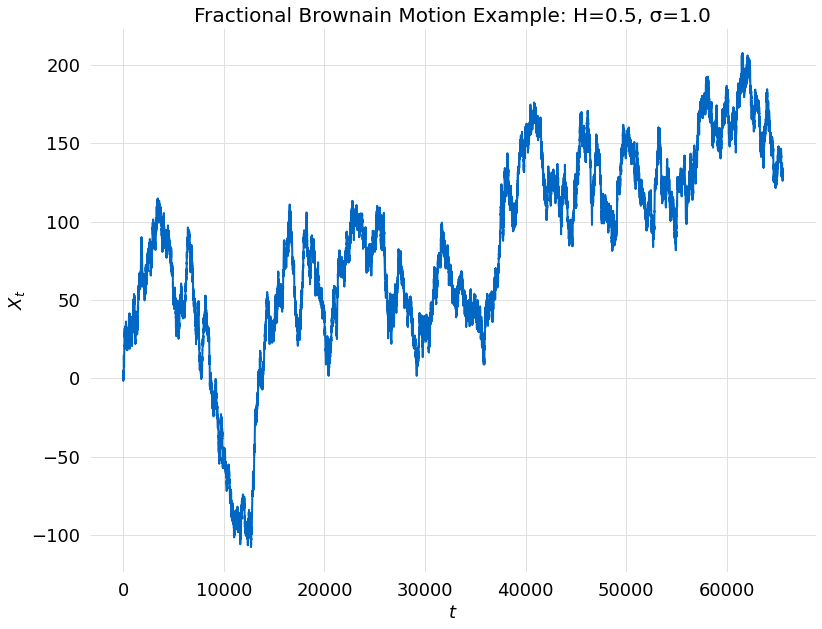

In [24]:
sample_plot(samples[0], H_vals[0])

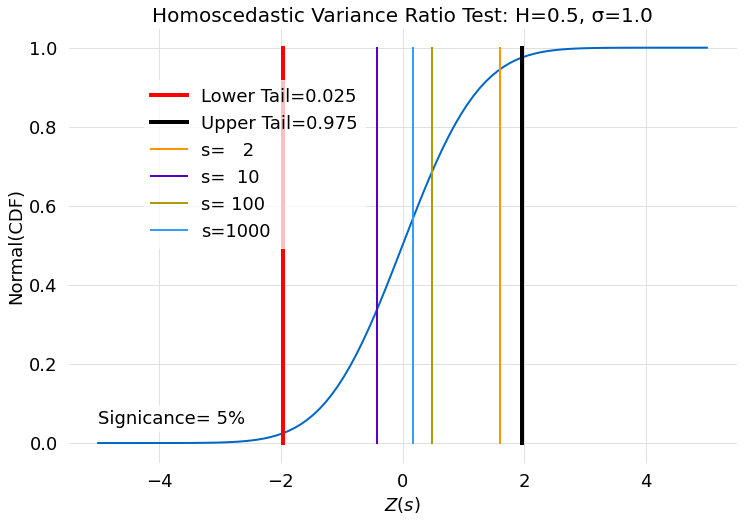

In [25]:
homo_test_stat_plot(s_vals, samples[0], H_vals[0])

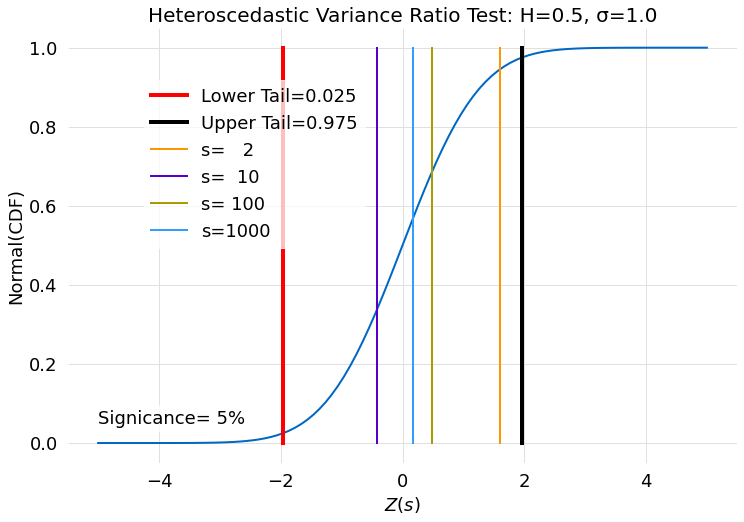

In [26]:
hetero_test_stat_plot(s_vals, samples[0], H_vals[0])

### H = 0.3

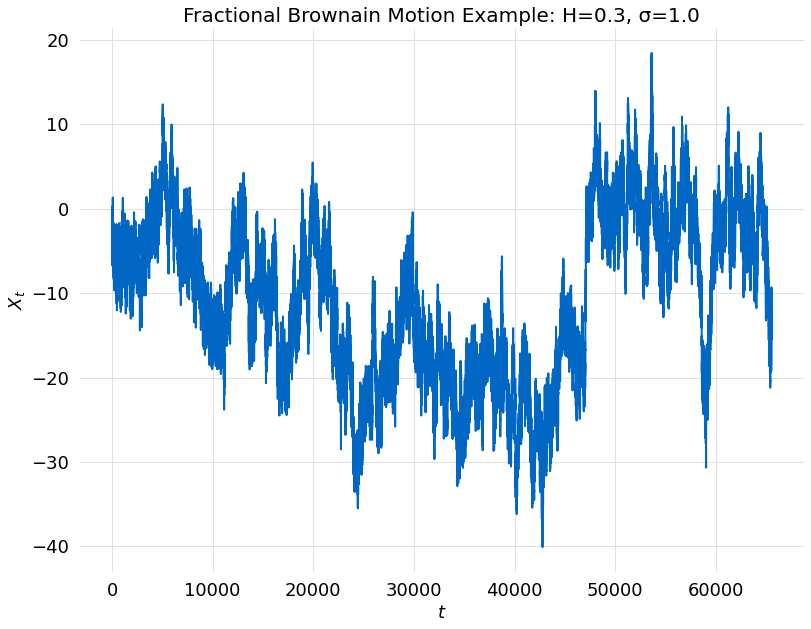

In [27]:
sample_plot(samples[1], H_vals[1])

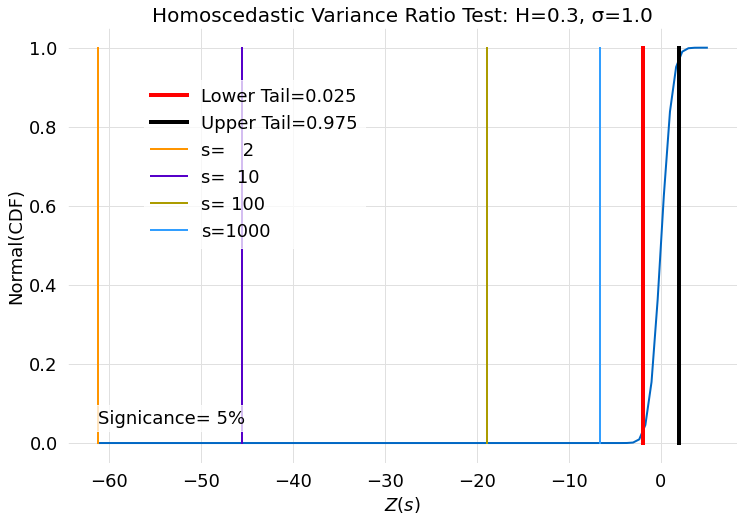

In [28]:
homo_test_stat_plot(s_vals, samples[1], H_vals[1])

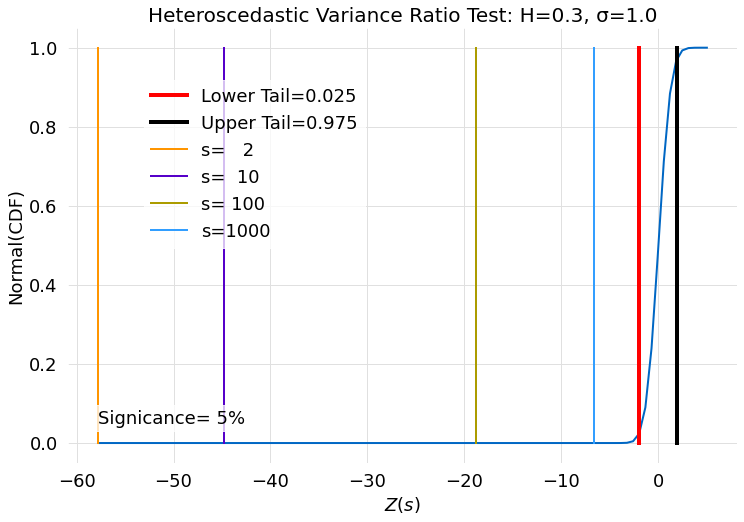

In [29]:
hetero_test_stat_plot(s_vals, samples[1], H_vals[1])

### H=0.7

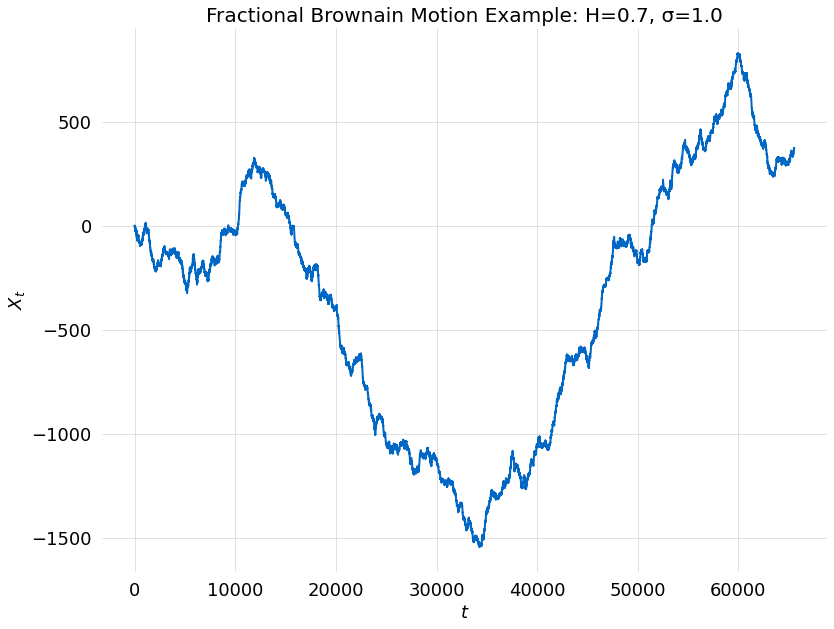

In [30]:
sample_plot(samples[2], H_vals[2])

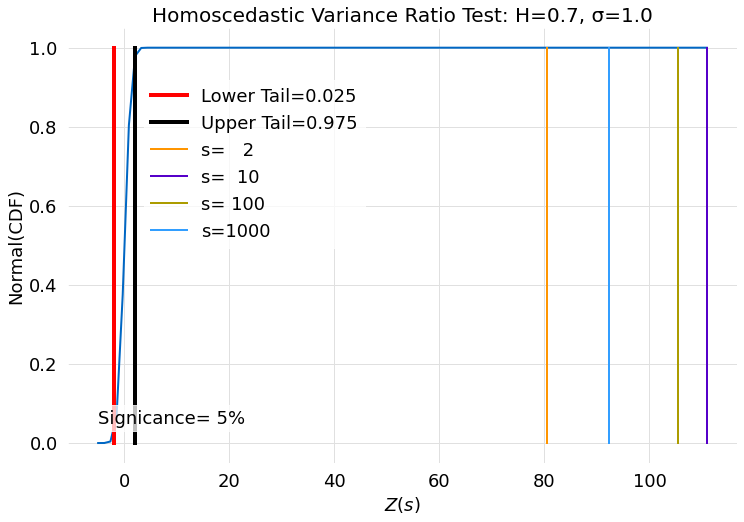

In [31]:
homo_test_stat_plot(s_vals, samples[2], H_vals[2])

In [ ]:
hetero_test_stat_plot(s_vals, samples[2], H_vals[2])

### Values Near H=0.5

In [ ]:
npts = 2**16
s_vals = [2, 10, 100, 1000]
H_vals = [0.475, 0.49, 0.51, 0.525]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

#### H=0.51

In [ ]:
sample_plot(samples[2], H_vals[2])

In [ ]:
homo_test_stat_plot(s_vals, samples[2], H_vals[2])

In [ ]:
hetero_test_stat_plot(s_vals, samples[2], H_vals[2])

#### H=0.49

In [ ]:
sample_plot(samples[1], H_vals[1])

In [ ]:
homo_test_stat_plot(s_vals, samples[1], H_vals[1])

In [ ]:
hetero_test_stat_plot(s_vals, samples[1], H_vals[1])

#### H=0.45

In [ ]:
sample_plot(samples[0], H_vals[0])

In [ ]:
homo_test_stat_plot(s_vals, samples[0], H_vals[0])

In [ ]:
hetero_test_stat_plot(s_vals, samples[0], H_vals[0])

### Small Sample Size

In [ ]:
npts = 2**9
s_vals = [4, 10, 25, 50, 100]
H_vals = [0.5, 0.7, 0.3]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

#### H=0.5

In [ ]:
sample_plot(samples[0], H_vals[0])

In [ ]:
homo_test_stat_plot(s_vals, samples[0], H_vals[0])

In [ ]:
hetero_test_stat_plot(s_vals, samples[0], H_vals[0])

#### H=0.7

In [ ]:
sample_plot(samples[1], H_vals[1])

In [ ]:
homo_test_stat_plot(s_vals, samples[1], H_vals[1])

#### H=0.3

In [ ]:
sample_plot(samples[2], H_vals[2])

In [ ]:
homo_test_stat_plot(s_vals, samples[2], H_vals[2])

In [ ]:
hetero_test_stat_plot(s_vals, samples[2], H_vals[2])

### Values Near H=0.5

In [ ]:
npts = 2**9
s_vals = [2, 4, 10, 25, 50]
H_vals = [0.49, 0.45, 0.4, 0.51, 0.55]
samples = [fbm.generate_fft(H, npts) for H in H_vals]

#### H=0.49

In [ ]:
sample_plot(samples[0], H_vals[0])

In [ ]:
homo_test_stat_plot(s_vals, samples[0], H_vals[0])

In [ ]:
hetero_test_stat_plot(s_vals, samples[0], H_vals[0])

#### H=0.45

In [ ]:
sample_plot(samples[1], H_vals[1])

In [ ]:
homo_test_stat_plot(s_vals, samples[1], H_vals[1])

In [ ]:
hetero_test_stat_plot(s_vals, samples[1], H_vals[1])

#### H=0.4

In [ ]:
sample_plot(samples[2], H_vals[2])

In [ ]:
homo_test_stat_plot(s_vals, samples[2], H_vals[2])

In [ ]:
hetero_test_stat_plot(s_vals, samples[2], H_vals[2])

#### H=0.51

In [ ]:
sample_plot(samples[3], H_vals[3])

In [ ]:
homo_test_stat_plot(s_vals, samples[3], H_vals[3])

In [ ]:
hetero_test_stat_plot(s_vals, samples[3], H_vals[3])

#### H=0.55

In [ ]:
sample_plot(samples[4], H_vals[4])

In [ ]:
homo_test_stat_plot(s_vals, samples[4], H_vals[4])

In [ ]:
hetero_test_stat_plot(s_vals, samples[4], H_vals[4])

## Variance Ratio Test

Here the performance of the variance ratio test is evaluated. In the previous analysis the performance of the homoscedastic test was not significantly different</br>
than the heteroscedastic test. Since the homoscedastic test is much faster it is used. The values of the variance ratio test statistic for $0 < H < \frac{1}{2}$, $H=\frac{1}{2}$</br>
and $\frac{1}{2} < H < 1$ respectively satisfy $Z(s) < 0$, $Z(s) = 0$ and $Z(s) > 0$. This follows from the variance ratio, $\text{VR}(s)$ satisfying $0 < \text{VR}(s) < 1$, $\text{VR}(s)=1$ and $\text{VR}(s) > 1$</br>
in that same regions. Plots of $Z(s)$ for these regions are shown below. It is seen for $0 < H < \frac{1}{2}$ that $Z(s)$ is an increasing function of $s$ and for $\frac{1}{2} < H < 1$</br>
$Z(s)$ has a more complex behavior but is increasing for smaller values of $s$. It follows that eventually for some value of $s$ the test will likely fail. This makes interpreting the tests</br> 
results somewhat difficult. In the previous analysis where $\text{VR}(s)$ was compared to $\sigma s^{2H-1}$ it was seen that for a series with $2^9$ points the the two values agreed well for</br>
up to $s=2^8$. This motivates evaluating $Z(s)$ in regions where it is always increasing using a sequence of values of $s$ satisfying $s \le 25$. For this range the agreement between $\text{VR}(s)$</br>
and $\sigma s^{2H-1}$ was best. $Z(s)$ is evaluated for each $s$ and the result for the entire test is taken as majority result.

### $H \le \frac{1}{2}$

In [ ]:
npts = 2**9
s_vals = numpy.array([int(s) for s in numpy.linspace(2.0, npts/2, int(npts/2-1))])

In [ ]:
H_vals = [0.1, 0.2, 0.3, 0.4, 0.5]
samples = [fbm.generate_fft(H, npts) for H in H_vals]
stats = vr_stats(samples, s_vals)

In [ ]:
title = r"Variance Ratio Statistic"
s = numpy.tile(s_vals, (len(H_vals), 1))
comparison(stats, s, title=title, labels=H_labels(H_vals), plot_type=DataPlotType.VR_STAT)

### $H \ge \frac{1}{2}$

In [ ]:
H_vals = [0.5, 0.6, 0.7, 0.8, 0.89]
samples = [fbm.generate_fft(H, npts) for H in H_vals]
stats = vr_stats(samples, s_vals)

In [ ]:
title = r"Variance Ratio Statistic"
s = numpy.tile(s_vals, (len(H_vals), 1))
comparison(stats, s, title=title, labels=H_labels(H_vals), plot_type=DataPlotType.VR_STAT)

### $H = 0.5$

Here a two tailed test for brownian motion is performed. This test is successful if the result is **PASSED**

In [ ]:
H=0.5
samples = fbm.generate_fft(H, npts)
result = fbm.vr_test(samples, sig_level=0.05, test_type=HypothesisType.TWO_TAIL, report=True)

In [ ]:
homo_test_stat_plot([4, 6, 10, 16, 24], samples, H, test_type=HypothesisType.TWO_TAIL)

### $H = 0.45$

Here a lower tail test is performed for fractional brownian with $H<\frac{1}{2}$. The test is successful if the result is **Failed**.

In [ ]:
H=0.45
samples = fbm.generate_fft(H, npts)
result = fbm.vr_test(samples, sig_level=0.05, test_type=HypothesisType.LOWER_TAIL, report=True)

In [ ]:
homo_test_stat_plot([4, 6, 10, 16, 24], samples, H, test_type=HypothesisType.LOWER_TAIL)

### $H = 0.6$

Here an upper tailed test for fractional brownian motion with $H > \frac{1}{2}$. The test is successful if the result is **Failed**.

In [ ]:
H=0.6
samples = fbm.generate_fft(H, npts)
result = fbm.vr_test(samples, sig_level=0.05, test_type=HypothesisType.UPPER_TAIL, report=True)

In [ ]:
homo_test_stat_plot([4, 6, 10, 16, 24], samples, H, test_type=HypothesisType.UPPER_TAIL)